In [2]:
import pickle
loaded_model = pickle.load(open('final_model.sav', 'rb'))

In [3]:
loaded_model

Pipeline(steps=[('Preprocess',
                 Pipeline(steps=[('datext',
                                  TransformerWrapper(include=['dteday'],
                                                     transformer=ExtractDateTimeFeatures(features=['day',
                                                                                                   'month',
                                                                                                   'year',
                                                                                                   'weekday']))),
                                 ('encoder',
                                  TransformerWrapper(include=['dteday_weekday',
                                                              'dteday_day',
                                                              'dteday_month',
                                                              'dteday_year',
                                                              'season',
                                                              'weathersit'],
                                                     transformer=OneHotEncoder(drop='first',
                                                                               handle_unknown='ignore'))),
                                 ('selection',
                                  ColumnTransformer(remainder='passthrough',
                                                    transformers=[('drop_out',
                                                                   'drop',
                                                                   ['atemp',
                                                                    'casual',
                                                                    'registered'])],
                                                    verbose_feature_names_out=False))])),
                ('model',
                 TransformedTargetRegressor(func=<ufunc 'log'>,
                                            inverse_func=<ufunc 'exp'>,
                                            regressor=<catboost.core.CatBoostRegressor object at 0x000001E441A6FFD0>))])

In [27]:
import pandas as pd
import numpy as np
data = pd.read_csv('data_bike_sharing.csv', parse_dates=['dteday'])
df = pd.DataFrame(data)

In [14]:
from sklearn.model_selection import train_test_split

data = df.copy()
df_seen, df_unseen = train_test_split(data, test_size=0.2, random_state=10)

In [17]:
X = df_unseen.drop(columns='cnt')
y = df_unseen['cnt']

In [20]:
y_pred = loaded_model.predict(X)


In [28]:
result = X.copy()
result['cnt'] = y
result['pred'] = y_pred
result['residual'] = y - y_pred
result['mape'] = np.abs((result['cnt'] - result['pred']) / result['cnt']) 

In [31]:
result.mape.mean()

0.14730620507468092

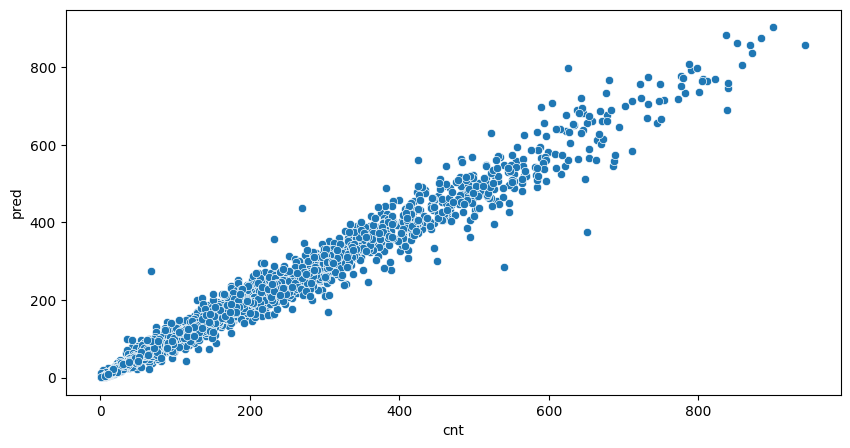

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,5))
sns.scatterplot(data=result, x='cnt',y='pred')
plt.show()